## Used Car Price Prediction

There are id and 12 characteristics of cars and the price.

1. Id - Car's id
2. Name - The brand and model of the car.
3. Location - The location in which the car is being sold or is available for purchase.
4. Year - The year or edition of the model.
5. Kilometers_Driven - The total kilometers are driven in the car by the previous owner(s) in KM.
6. Fuel_Type - The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
7. Transmission - The type of transmission used by the car. (Automatic / Manual)
8. Owner_Type - First, Second, Third, or Fourth & Above
9. Mileage - The standard mileage offered by the car company in kmpl or km/kg
10. Engine - The displacement volume of the engine in CC.
11. Power - The maximum power of the engine in bhp.
12. Seats - The number of seats in the car.
13. New_Price - The price of a new car of the same model.
14. Price - The price of the car (target).

### Loading the dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
cars_df = pd.read_csv( "./data/usedcar.csv", index_col=[0] )

### Showing few records

In [3]:
cars_df.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


### Getting metadata

In [66]:
cars_df.shape

(6019, 13)

In [67]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 658.3+ KB


In [68]:
cars_df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

### Indexing and Slicing

In [69]:
cars_df[0:2]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50


In [70]:
cars_df[-2:]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65
6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,NaN,2.50


In [71]:
cars_df[['Name', 'Price']][0:5]

,Name,Price
0,Maruti Wagon R LXI CNG,1.75
1,Hyundai Creta 1.6 CRDi SX Option,12.50
2,Honda Jazz V,4.50
3,Maruti Ertiga VDI,6.00
4,Audi A4 New 2.0 TDI Multitronic,17.74


## Insights

### What are different transmission types and how may cars are available from each transmission type?

In [72]:
cars_df.Transmission.value_counts()

Manual       4299
Automatic    1720
Name: Transmission, dtype: int64

### What are different owner types and how may cars are available from each owner type?

In [73]:
cars_df.Owner_Type.value_counts()

First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

### How many kilometers the cars were driven before before being offered for sale?

In [74]:
import matplotlib.pyplot as plt
import seaborn as sn

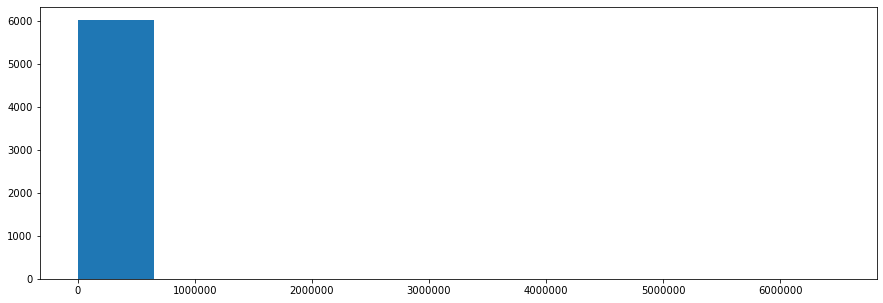

In [75]:
plt.figure(figsize=(15,5))
ax = plt.gca()
ax.xaxis.get_major_formatter().set_scientific(False)
plt.hist(cars_df['Kilometers_Driven']);

In [76]:
cars_df[cars_df.Kilometers_Driven > 200000].shape

(31, 13)

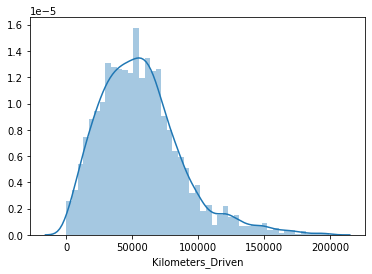

In [77]:
sn.distplot(cars_df[cars_df.Kilometers_Driven < 200000]['Kilometers_Driven'])

### At what prices diffrence cars were sold?

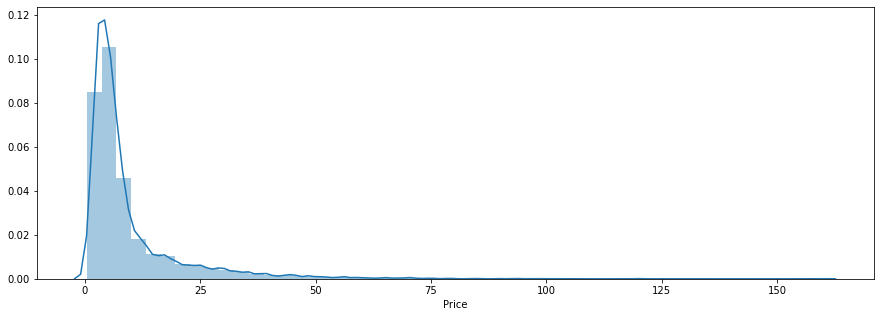

In [78]:
plt.figure(figsize=(15,5))
sn.distplot(cars_df['Price'])

In [79]:
cars_df['Price'].mean()

9.479468350224273

In [80]:
cars_df['Price'].std()

11.187917112455484

In [81]:
from scipy import stats

In [82]:
stats.norm.interval(0.95,
                    cars_df['Price'].mean(),
                    cars_df['Price'].std())

(-12.448446252207834, 31.40738295265638)

In [83]:
stats.norm.interval(0.997,
                    cars_df['Price'].mean(),
                    cars_df['Price'].std())

(-23.7233375699902, 42.68227427043862)

### Outliers

Using 3 standard deviation approach.

In [84]:
cars_df[cars_df.Price > 43]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
134,Mercedes-Benz SLC 43 AMG,Kolkata,2017,13372,Petrol,Automatic,First,19.0 kmpl,2996 CC,362.07 bhp,2.0,95.04 Lakh,54.00
168,BMW X5 xDrive 30d,Mumbai,2015,41000,Diesel,Automatic,First,15.3 kmpl,2993 CC,258 bhp,5.0,NaN,45.00
191,Land Rover Range Rover 2.2L Dynamic,Coimbatore,2018,36091,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,55.76
216,Audi A8 L 3.0 TDI quattro,Delhi,2012,56000,Diesel,Automatic,First,11.8 kmpl,2967 CC,246.7 bhp,5.0,NaN,45.00
264,Mercedes-Benz GLE 350d,Coimbatore,2017,29819,Diesel,Automatic,First,11.57 kmpl,2987 CC,254.79 bhp,5.0,95.13 Lakh,61.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5900,Mercedes-Benz GLC 220,Coimbatore,2017,50794,Diesel,Automatic,First,17.9 kmpl,2143 CC,170 bhp,5.0,NaN,43.30
5919,Jaguar F Type 5.0 V8 S,Hyderabad,2015,8000,Petrol,Automatic,First,12.5 kmpl,5000 CC,488.1 bhp,2.0,NaN,100.00
5927,Audi Q5 3.0 TDI Quattro Technology,Coimbatore,2018,29091,Diesel,Automatic,First,13.22 kmpl,2967 CC,241.4 bhp,5.0,NaN,45.52
5946,BMW 5 Series 2013-2017 530d M Sport,Bangalore,2016,16000,Diesel,Automatic,First,14.69 kmpl,2993 CC,258 bhp,5.0,NaN,48.00


### Using box plot

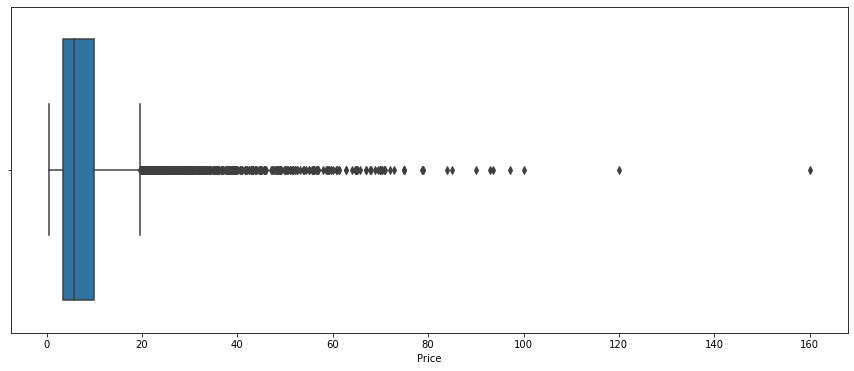

In [85]:
plt.figure(figsize=(15,6))
boxp = sn.boxplot(cars_df['Price']);

In [86]:
cars_df['Price'].median()

5.64

In [87]:
iqr = stats.iqr(cars_df['Price'])
iqr

6.449999999999999

In [88]:
cars_df['Price'].describe()

count    6019.000000
mean        9.479468
std        11.187917
min         0.440000
25%         3.500000
50%         5.640000
75%         9.950000
max       160.000000
Name: Price, dtype: float64

In [89]:
min_price = cars_df['Price'].describe()['25%'] - 1.5 * iqr
max_price = cars_df['Price'].describe()['75%'] + 1.5 * iqr

In [90]:
min_price, max_price

(-6.174999999999999, 19.625)

In [91]:
cars_df[cars_df.Price < 20]['Price'].shape

(5318,)

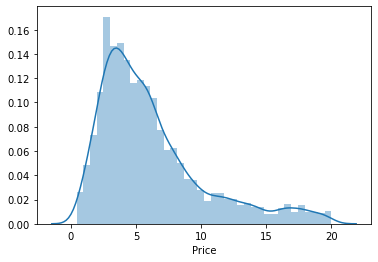

In [92]:
sn.distplot(cars_df[cars_df.Price < 20]['Price'])

### Different makes and models

In [93]:
cars_df['make'] = cars_df['Name'].map( lambda x: x.lower().split()[0] )

In [94]:
cars_df.make.value_counts()

maruti           1211
hyundai          1107
honda             608
toyota            411
mercedes-benz     318
volkswagen        315
ford              300
mahindra          272
bmw               267
audi              236
tata              186
skoda             173
renault           145
chevrolet         121
nissan             91
land               60
jaguar             40
fiat               28
mitsubishi         27
mini               26
volvo              21
porsche            18
jeep               15
datsun             13
force               3
isuzu               3
ambassador          1
bentley             1
lamborghini         1
smart               1
Name: make, dtype: int64

In [95]:
#cars_df[cars_df['Name'].str.contains("i10 Asta")].sample(10)

In [96]:
cars_df['model'] = cars_df['Name'].map( lambda x: x.lower().split(" ")[1] )

In [97]:
cars_df['model'].unique()

array(['wagon', 'creta', 'jazz', 'ertiga', 'a4', 'eon', 'micra', 'innova',
       'vento', 'indica', 'ciaz', 'city', 'swift', 'rover', 'pajero',
       'amaze', 'duster', 'new', '3', 's', 'a6', 'i20', 'alto', 'wrv',
       'corolla', 'ssangyong', 'vitara', 'kuv', 'm-class', 'polo', 'nano',
       'elantra', 'xcent', 'thar', 'grand', 'kwid', 'i10', 'x-trail',
       'zen', 'figo', 'c-class', 'cayenne', 'xuv500', 'terrano', 'brio',
       'fiesta', 'santro', 'zest', 'ritz', '5', 'fortuner', 'ecosport',
       'verna', 'go', 'omni', 'etios', 'xf', 'eeco', 'civic', 'v40', 'b',
       'scorpio', 'cr-v', 'slc', '1', 'beat', 'rapid', 'rs5', 'superb',
       'x5', 'glc', 'countryman', 'optra', 'lodgy', 'e-class', 'baleno',
       'laura', 'nuvosport', 'fabia', 'indigo', 'q3', 'octavia', 'a8',
       'verito', 'cooper', 'santa', 'x1', 'accent', 'tucson', 'gle',
       'a-star', 'grande', 'x3', 'q7', 'jetta', 'gla', 'celerio', 'sumo',
       'accord', '6', 'manza', 'spark', 'clubman', 'teana', '

In [98]:
len(cars_df['model'].unique())

211

In [99]:
cars_df['model'].value_counts()

swift         353
city          270
i20           247
verna         170
innova        164
             ... 
clubman         1
fusion          1
countryman      1
xuv300          1
venture         1
Name: model, Length: 211, dtype: int64

### Top 10 reselling models

In [100]:
top_10_models = list(cars_df['model'].value_counts().index[0:10])

In [101]:
top_10_models

['swift',
 'city',
 'i20',
 'verna',
 'innova',
 'grand',
 'i10',
 'wagon',
 'polo',
 'alto']

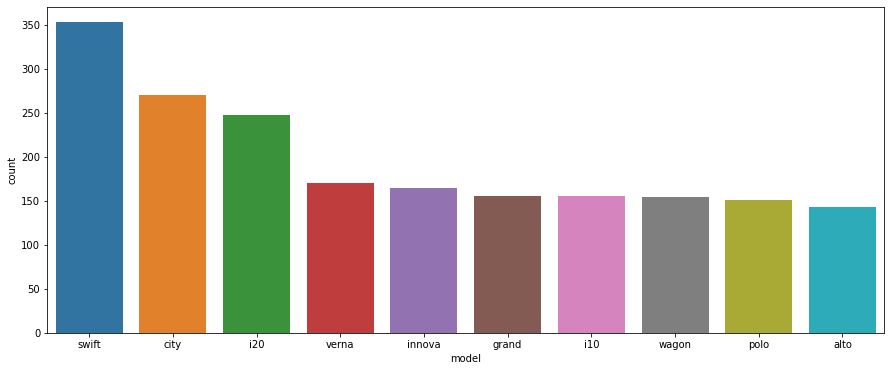

In [102]:
plt.figure(figsize=(15, 6))
sn.countplot(data = cars_df,
             x = 'model',
             order = top_10_models);

In [103]:
cars_df[cars_df.model == 'grand'][0:5]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,make,model
54,Hyundai Grand i10 Sportz,Chennai,2015,54000,Petrol,Manual,Third,18.9 kmpl,1197 CC,82 bhp,5.0,NaN,3.60,hyundai,grand
88,Hyundai Grand i10 Sportz,Bangalore,2016,16000,Petrol,Manual,First,18.9 kmpl,1197 CC,82 bhp,5.0,NaN,5.75,hyundai,grand
173,Hyundai Grand i10 1.2 Kappa Asta,Kolkata,2019,1000,Petrol,Manual,First,18.9 kmpl,1197 CC,81.86 bhp,5.0,7.39 Lakh,6.50,hyundai,grand
248,Hyundai Grand i10 CRDi Era,Mumbai,2017,33000,Diesel,Manual,First,24.0 kmpl,1120 CC,70 bhp,5.0,NaN,4.75,hyundai,grand
259,Hyundai Grand i10 Magna,Mumbai,2014,16514,Petrol,Manual,First,18.9 kmpl,1197 CC,82 bhp,5.0,NaN,3.75,hyundai,grand


### What is sales price of cars of top 10 models looks like?

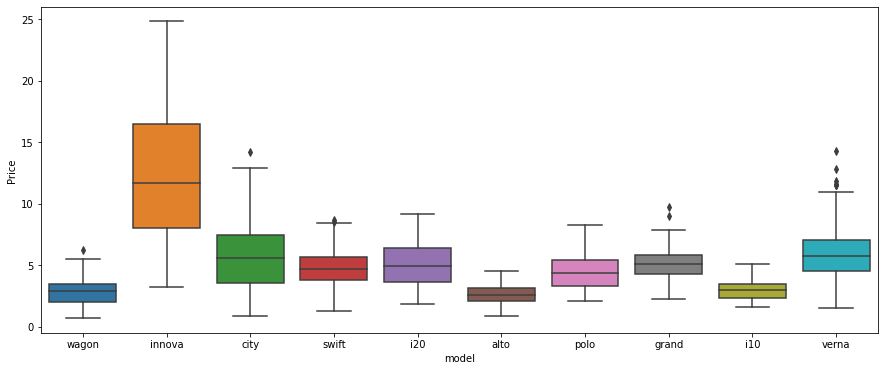

In [179]:
plt.figure(figsize=(15, 6))
sn.boxplot(data = cars_df[cars_df.model.isin(top_10_models)],
           x = 'model',
           y = 'Price' );

### Convering datatypes of columns

In [104]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
 13  make               6019 non-null   object 
 14  model              6019 non-null   object 
dtypes: float64(2), int64(2), object(11)
memory usage: 912.4+ KB


In [105]:
import math

In [106]:
def get_float_val(x):
    if x is None:
        return None   
    
    val = str(x).split()[0]
    
    if val.replace(".","",1).isdigit():
        return float(val)        
    else:
        return None

In [107]:
cars_df['mileage_new'] = cars_df.Mileage.map(lambda x: get_float_val(x))

In [108]:
cars_df.mileage_new

0       26.60
1       19.67
2       18.20
3       20.77
4       15.20
        ...  
6014    28.40
6015    24.40
6016    14.00
6017    18.90
6018    25.44
Name: mileage_new, Length: 6019, dtype: float64

In [109]:
cars_df['engine_new'] = cars_df.Engine.map(lambda x: get_float_val(x))
cars_df['power_new'] = cars_df.Power.map(lambda x: get_float_val(x))

### How engine power and mileage is effecting price of the used cars?

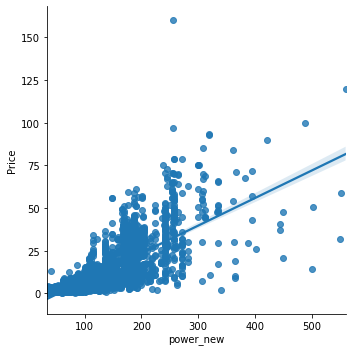

In [114]:
sn.lmplot(data = cars_df,
          x = 'power_new',
          y = 'Price');

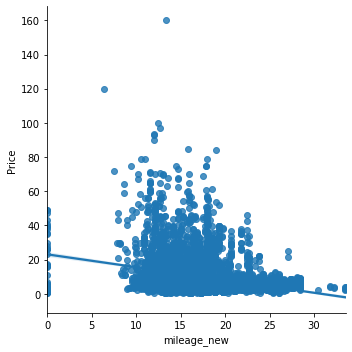

In [115]:
sn.lmplot(data = cars_df,
          x = 'mileage_new',
          y = 'Price');

In [112]:
corr_mat = cars_df[['Price', 'mileage_new', 'engine_new', 'power_new', 'Kilometers_Driven']].corr()

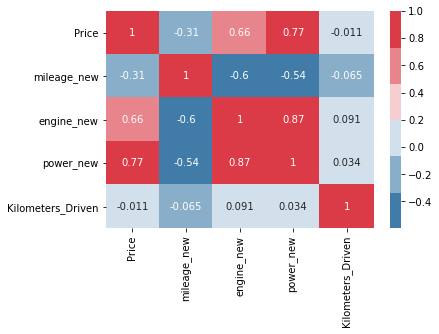

In [113]:
sn.heatmap(corr_mat,
           annot=True,
           cmap = sn.diverging_palette(240, 10));

#### Inferences

- Price, Kilometers_Driven are negative correlated to price
- engine capacity and power are positively correlatd to price

### How Kilometers Driven is effecting price of the used cars?

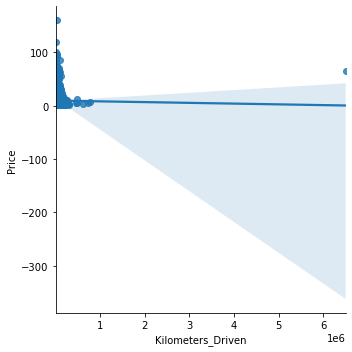

In [117]:
sn.lmplot(data = cars_df,
          x = 'Kilometers_Driven',
          y = 'Price');

In [118]:
cars_df.Kilometers_Driven.quantile(0.25)

34000.0

In [119]:
cars_df.Kilometers_Driven.quantile(0.75)

73000.0

In [120]:
def min_max_range(vals):
    iqr = vals.quantile(0.75) - vals.quantile(0.25)
    min_val = vals.quantile(0.25) - 3.0 * iqr
    max_val = vals.quantile(0.75) + 3.0 * iqr
    
    return min_val, max_val

In [121]:
min_km, max_km = min_max_range(cars_df.Kilometers_Driven)

In [122]:
min_km, max_km

(-83000.0, 190000.0)

In [123]:
min_price, max_price = min_max_range(cars_df.Price)

In [124]:
min_price, max_price

(-15.849999999999998, 29.299999999999997)

In [125]:
new_cars_df = cars_df[(cars_df.Kilometers_Driven <= max_km) &
                      (cars_df.Price <= max_price)]

In [126]:
new_cars_df.shape

(5593, 18)

In [127]:
new_corr_mat = new_cars_df[['Price', 'mileage_new', 'engine_new', 'power_new', 'Kilometers_Driven']].corr()

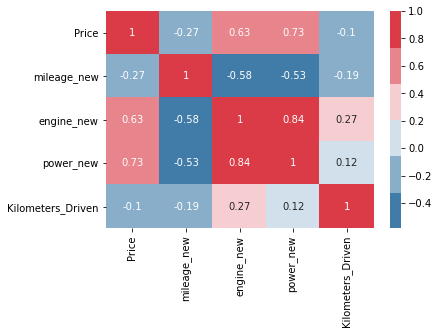

In [135]:
sn.heatmap(new_corr_mat,
           annot=True,
           cmap = sn.diverging_palette(240, 10));

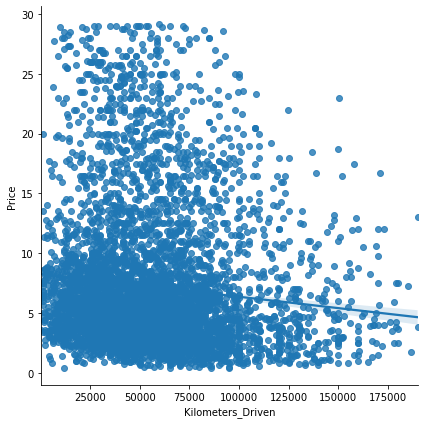

In [136]:
sn.lmplot(data = new_cars_df,
          x = 'Kilometers_Driven',
          y = 'Price',
          height=6);

### Location Vs. Transmission or Fuel Type

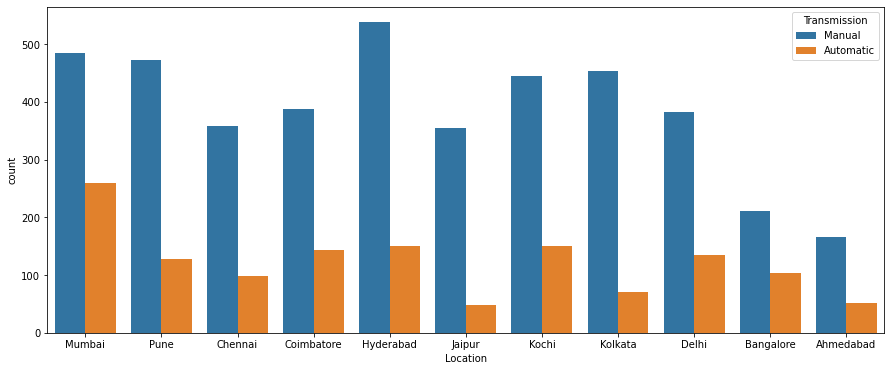

In [139]:
plt.figure(figsize=(15, 6))
sn.countplot( data = new_cars_df,
              x = 'Location',
              hue = 'Transmission');

In [142]:
pd.crosstab(new_cars_df.Location,
            new_cars_df.Transmission,
            normalize='index') * 100

Transmission,Automatic,Manual
Location,,
Ahmedabad,23.853211,76.146789
Bangalore,33.015873,66.984127
Chennai,21.615721,78.384279
Coimbatore,27.118644,72.881356
Delhi,26.112186,73.887814
Hyderabad,21.802326,78.197674
Jaipur,11.940299,88.059701
Kochi,25.335570,74.664430
Kolkata,13.523810,86.476190


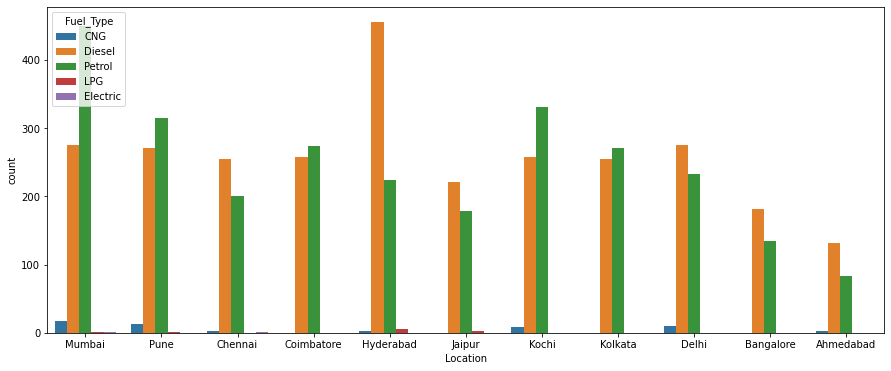

In [144]:
plt.figure(figsize=(15, 6))
sn.countplot( data = new_cars_df,
              x = 'Location',
              hue = 'Fuel_Type');

### Does Manual cars have better mileage than Automatic Cars

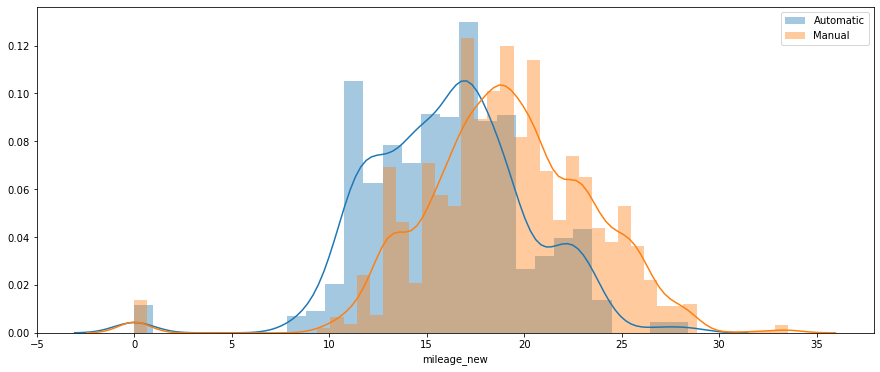

In [161]:
plt.figure(figsize=(15, 6))
sn.distplot(new_cars_df[new_cars_df.Transmission == 'Automatic']['mileage_new'], label = 'Automatic')
sn.distplot(new_cars_df[new_cars_df.Transmission == 'Manual']['mileage_new'], label = 'Manual')
plt.legend();

### Kilometers Driven for cars sold under 20 L

In [168]:
under_20L_cars = new_cars_df[new_cars_df.Price < 20]

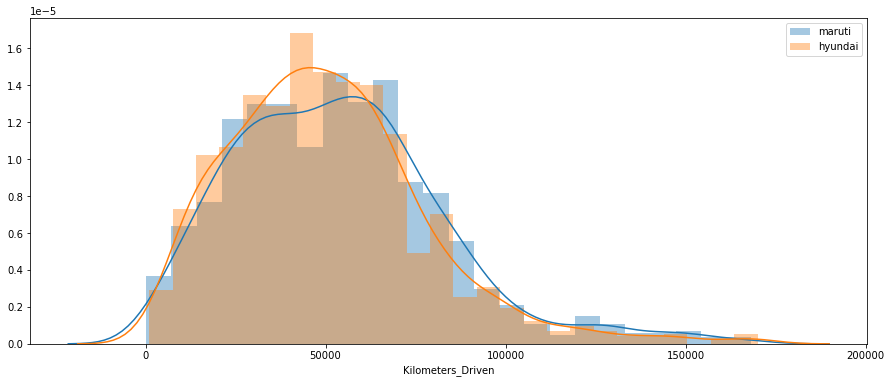

In [169]:
plt.figure(figsize=(15, 6))
sn.distplot(under_20L_cars[under_20L_cars.make == 'maruti']['Kilometers_Driven'], label = 'maruti')
sn.distplot(under_20L_cars[under_20L_cars.make == 'hyundai']['Kilometers_Driven'], label = 'hyundai')
plt.legend();

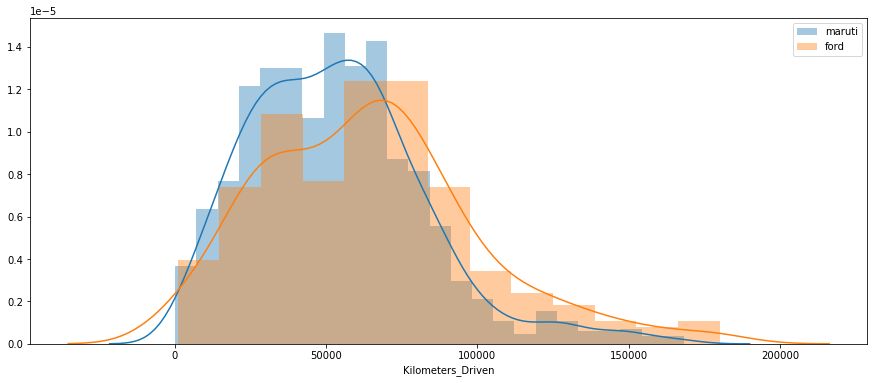

In [170]:
plt.figure(figsize=(15, 6))
sn.distplot(under_20L_cars[under_20L_cars.make == 'maruti']['Kilometers_Driven'], label = 'maruti')
sn.distplot(under_20L_cars[under_20L_cars.make == 'ford']['Kilometers_Driven'], label = 'ford')
plt.legend();

### Sold price for cars driven under 1L KM

In [175]:
under_1LKM_cars = new_cars_df[new_cars_df.Kilometers_Driven < 100000]

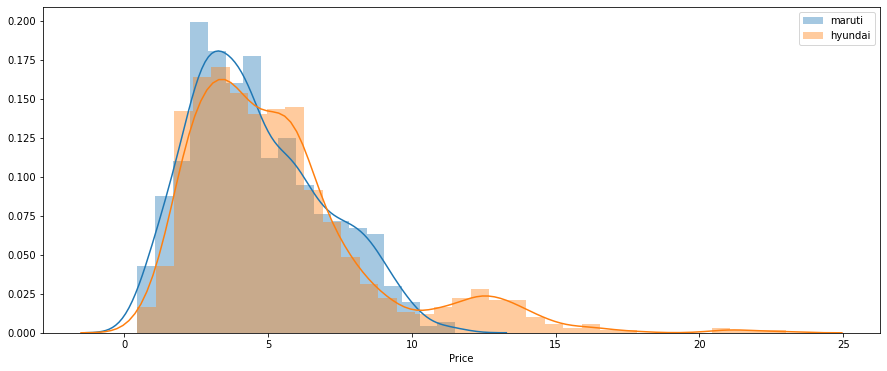

In [173]:
plt.figure(figsize=(15, 6))
sn.distplot(under_1LKM_cars[under_1LKM_cars.make == 'maruti']['Price'], label = 'maruti')
sn.distplot(under_1LKM_cars[under_1LKM_cars.make == 'hyundai']['Price'], label = 'hyundai')
plt.legend();

### Saving the dataset (with new features) 

In [171]:
cars_df.to_csv( "new_used_car.csv", index = False )

### Tasks:

1. Find out differnet Fuel types and their counts.
2. Find out different Year (The year or edition of the model.) and their counts (Draw a bar/count plot).
3. Find out mileage of difference cars (use dist plot or histogram).
4. Find the car outliers in terms of power.
5. What is the correlation between New_Price and price. Take only those samples that have New_Price data available.
6. What does the the kilometers driven by top 10 models looks like? (Use box plots across models for comparison)
7. What is the corrleation between 'Price', 'mileage_new', 'engine_new', 'power_new', 'Kilometers_Driven' for a only Maruti models?
8. Compare the sold price of cars with owner types: First owner and second owner.
9. Compare the sold price of cars in Mumbai and Kochi for maruti models only.
10. Find out top 5 makes in used cars with more than 200 bhp.